# Teoría de Grafos
Adrián Fernández Cano

##Librerías

In [498]:
import IPython
%matplotlib inline
#sci py libraries
import numpy as np
import scipy as sp
import scipy.linalg as la
#abstract graphs libraries
import networkx as nx
import random
#ploting and drawing libraries:
from nxpd import draw
import scipy.integrate as sint
import matplotlib.pyplot as plt

<br/>
##Definición de grafo
Un grafo <b>G = (V, E)</b> es una par ordenado donde <b>V</b> es un conjunto normalmente finito de vértices(nodos) unidos
por enlaces (aristas). <b>E</b> es el conjunto de pares (aristas) que relacionan a estos vértices.

- Si <b>E</b> es un conjunto de <b>pares no ordenados</b> de elementos de V es un <b>grafo no dirigido</b>.
- Si <b>E</b> es un conjunto de <b>pares ordenados</b> de elementos de V es un <b>grafo dirigido</b>.
    - Dada una arista (a, b), a es su nodo inicial y b su nodo final.

##Definiciones
- Se llama <b>orden</b> del grafo G a su número de vértices, |V|.
- El <b>grado</b> de un vértice es el número de aristas que lo tienen como extremo.
- Un <b>bucle</b> es una arista que relaciona al mismo nodos. El nodo inicial y final coinciden.
- Dos o más aristas que relacionan al mismo par de vertices se denominan <b>aristas múltiples o pararelas</b>.
- Decimos que dos aristas son adyacentes si tienen un extremo en común.
- Un vertice u es <b>adyacente</b> a otro vertice w si el grafo contiene una arista (u,w) que los une.

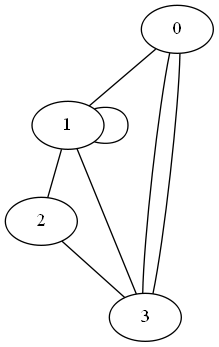

In [499]:
"""Crear multigrafo vacío (sin nodos ni aristas)"""
grafo1 = nx.MultiGraph() 

"""Crear un 'bundle' de nodos y añadirlos"""
bundle = nx.path_graph(4)
grafo1.add_nodes_from(bundle)

""" Establecer las aristas"""
grafo1.add_edges_from([(0,1), (1,2), (2,3), (3,1), (0,3), (0,3), (1,1)])
draw(grafo1, show='ipynb')

- El <b>orden</b> del grafo anterior será -> numVertices = grafo.number_of_nodes() -> 4
- El <b>grado</b> del grafo anterior será -> numAristas = grafo.number_of_edges() -> 7
- En el nodo 1 tenemos un <b>bucle</b>.
- Entre el nodo 0 y 3 tenemos <b>aristas múltiples</b>.
- El vertice 2 es <b>adyacente</b> al vertice 3.
- La arista (2, 3) es adyacente a la arista (1,2).

##Grafo simple
Un grafo es <b>simple</b> si como mucho entre dos vértices cualesquiera solo existe una arista que los une, no se admiten
ni aristas múltiples ni bucles.
Un grafo que no es simple se denomina <b>multigrafo</b>.

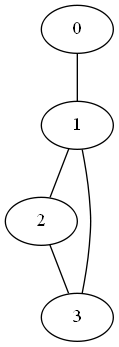

In [500]:
"""Crear grafo vacío (sin nodos ni aristas)"""
grafo = nx.Graph() 

"""Crear un 'bundle' de nodos y añadirlos"""
bundle = nx.path_graph(4)
grafo.add_nodes_from(bundle)

""" Establecer las aristas"""
grafo.add_edges_from([(0,1), (1,2), (2,3), (3,1)])
draw(grafo, show='ipynb')

##Multigrafo o pseudografo
Es un grafo que puede tener <b>aristas multiples</b> entre dos nodos.
El grafo presentado al principio se corresponde a un ejemplo de multigrafo no dirigido.


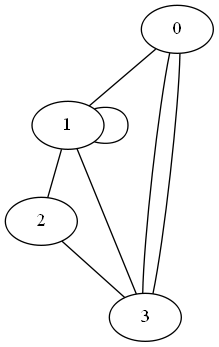

In [501]:
draw(grafo1, show='ipynb')

##Representación de grafos
Las dos representaciones principales son la <b>matriz de adyacencia</b> y la <b>lista de adyacencia</b>.
- <b>Matriz de adyacencia (MA)</b>: Sea un grafo G = (V, E), con |V| = n. La matriz de adyacencia de G es de tamaño n*n, las
filas y las columnas hacen referencia a los vértices. La celda MA[i, j] almacena el número de aristas entre el vertice i y j. Si 
su valor es 0 significa que no existe arista entre esos vertices.

El ejemplo siguiente muestra una matriz similar a la anterior pero creada utilizando una matriz de adyacencia.
El valor de la celda MA[0,3] vale 3 para mostrar tres aristas entre los vertices 0 y 3:

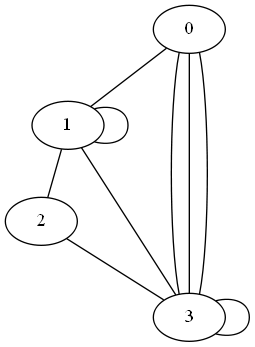

In [502]:
matrizAdyacencia = np.matrix([[0,1,0,3],
                             [1,1,1,1],
                             [0,1,0,1],
                             [3,1,1,1]])

"""Para poder mostrar las aristas multiples se debe poner 'parallel_edges = True' y  'create_using = nx.MultiGraph()'"""
grafoMatrizAdyacencia = nx.from_numpy_matrix(matrizAdyacencia, parallel_edges = True, create_using = nx.MultiGraph())
draw(grafoMatrizAdyacencia, show='ipynb')

##Camino
Se denomina <b>camino</b> a una secuencia de vértices dentro de un grafo tal que exista una arista entre cada par de vértices.
Dos caminos son <b>independientes</b> si no tienen ningún vértice en común excepto el primero y el último.
- La <b>longitud</b> de un camino es el número de aristas que usa dicho camino, contando las aristas que se repitan varias veces.
- La <b>distancia</b> de un camino (o entre dos vertices de un grafo) es el número de vértices mínimo que debe recorrerse para unirlos y es n/2.

El siguiente grafo de n vértices es un ejemplo de camino de orden n.
- Orden: n = 4
- Aristas (longitud): n-1 = 3
- Distancia: n/2 = 4/2 = 2



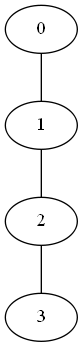

In [503]:
grafo = nx.Graph() 
bundle = nx.path_graph(4)
grafo.add_nodes_from(bundle)
grafo.add_edges_from([(0,1), (1,2), (2,3)])
draw(grafo, show='ipynb')

##Potencias de la matriz de adyacencia
La matriz de adyacencia de un grafo elevada a P nos determina el número de caminos de longitud P distintos.
Si en la matriz resultante nos encontramos un 0 significaría que entre esos dos vértices no existe ningún
camino de P tramos(longitud)

Ejemplo, usaremos la matriz de adyacencia usada anteriormente.

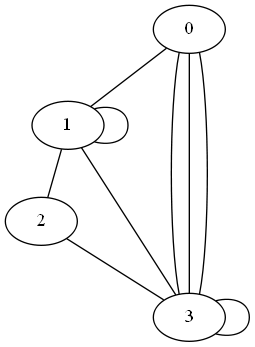

In [504]:
draw(grafoMatrizAdyacencia, show='ipynb')

A continuación elevamos a 2 la matriz de adyacencia para obtener el número de caminos de longitud 2 distintos entre
cada par de nodos.

In [505]:
matriz = np.linalg.matrix_power(matrizAdyacencia, 2)
print(b)

[[10  4  4  4]
 [ 4  4  2  6]
 [ 4  2  2  2]
 [ 4  6  2 12]]


Interpretando el resultado, significa por ejemplo que el número de caminos de longitud 2 distintos desde el nodo 1 al nodo 3
es igual a matriz[1, 3] = 6